# Data access

Finding, downloading, and cleaning data is an important, but laborious, part of geospatial data science. In this demo, we will download data programmatically using Application Programming Interfaces (APIs). We will also talk about strategies for downloading data when an API is unavailable or insufficient.

## APIs

So far in this course we have mainly been using data that has been downloaded **locally** from point-and-click GUIs. But it is becoming more and more common to access data programmatically from an online server. These platforms often have a **public API** that we can use to pull data inside our Python environment. 

An API is a type of **software** that provides a **standard set of protocols/functions** so that our computer can **communicate** with other computers (in contrast, a **user interface** is a type of software that connects a **computer** to a **person**)

The basic idea is we send a **request** (which may include query parameters and access credentials) to an endpoint. That endpoint will return a **response** code plus the data we asked for. For these kind of tasks, we have to carefully inspect the API **documentation** to understand what functions are available and what keyword arguments they require.

Many organizations have great APIs because they want people to use their data.

## Census Bureau

The US Census Bureau has a great API that makes demographic, socio-economic and housing statistics more accessible than ever before. 

Developers use customize these statistics to create apps that:

* Provide a local government a range of socioeconomic statistics on its population.

* Show commuting patterns for every city in America.

* Display the latest numbers on owners and renters in a neighborhood someone may want to live in.

Many students will use Census Bureau data in their final projects. 

## `census`

`census` is an interface to explore and query the US Census API in **Python**. It conveniently returns the data in **`Pandas` Dataframes** for further analysis. 

We know `census` is legitimate because it has an **active GitHub repository**. 

```{image} images/census-github.png
:width: 1000px
:align: center
```

More information about this package can be found [here](https://github.com/datamade/census).

First we should find how to install it, usually either through `conda` or `pip`. 

```{image} images/census-install.png
:width: 800px
:align: center
```

In [1]:
# Import package
from census import Census

Then search the documentation for examples...

```{image} images/census-examples.png
:width: 1000px
:align: center
```

In [3]:
c = Census("5f7e25f1ce5f52828e64cc4e5ff5f470759b4e03")
c.acs5.state(('NAME', 'B25034_010E'), '41')

[{'NAME': 'Oregon', 'B25034_010E': 92807.0, 'state': '41'}]

```{image} images/more-examples.png
:width: 1000px
:align: center
```

## USGS hydrologic data

Let's have a look at another API called [`dataretrieval`](https://github.com/DOI-USGS/dataretrieval-python) which was developed by USGS to retrieve hydrologic data.

```{image} images/usgs-github.png
:width: 1000px
:align: center
```

Again, the documentation makes it clear that we should install it using either `conda` or `pip`. 

```{image} images/usgs-install.png
:width: 800px
:align: center
```

In [4]:
%%capture
# Install package
!pip install -U dataretrieval

Now we can look through the documentation to see if the examples function as expected.

```{image} images/usgs.png
:width: 1000px
:align: center
```

In [5]:
# Import the functions for downloading data from NWIS
import dataretrieval.nwis as nwis

# Specify the USGS site code
site = '03339000'

# Get instantaneous values (iv)
df = nwis.get_record(sites=site, service='dv', start='2020-10-01', end='2021-09-30')
df.head()

,site_no,00010_ysi_Mean,00010_ysi_Mean_cd,00060_Mean,00060_Mean_cd,00065_Mean,00065_Mean_cd,00095_Mean,00095_Mean_cd,00300_Minimum,...,63680_ysi_Mean,63680_ysi_Mean_cd,91049_Mean,91049_Mean_cd,99133_Maximum,99133_Maximum_cd,99133_Minimum,99133_Minimum_cd,99133_Mean,99133_Mean_cd
datetime,,,,,,,,,,,,,,,,,,,,,
2020-10-01 00:00:00+00:00,03339000,14.9,A,75.7,A,2.04,A,672.0,A,8.9,...,3.7,A,NaN,NaN,4.1,A,3.3,A,3.7,A
2020-10-02 00:00:00+00:00,03339000,14.5,A,66.0,A,1.99,A,678.0,A,9.2,...,3.6,A,NaN,NaN,4.2,A,3.8,A,4.1,A
2020-10-03 00:00:00+00:00,03339000,14.2,A,60.2,A,1.96,A,678.0,A,9.4,...,3.2,A,NaN,NaN,3.8,A,3.0,A,3.4,A
2020-10-04 00:00:00+00:00,03339000,14.4,A,68.8,A,2.01,A,705.0,A,9.1,...,3.3,A,NaN,NaN,3.0,A,2.6,A,2.8,A
2020-10-05 00:00:00+00:00,03339000,13.4,A,66.8,A,1.99,A,718.0,A,9.6,...,3.1,A,NaN,NaN,3.4,A,2.7,A,3.0,A


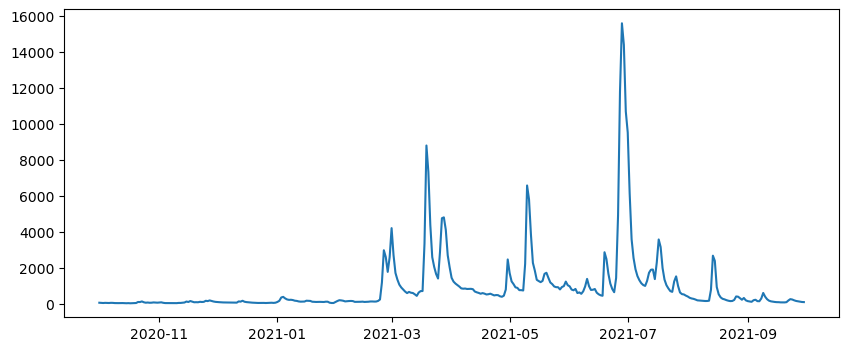

In [6]:
# Plot
f, ax = plt.subplots(1, 1, figsize=(10,4))
ax.plot(df['00060_Mean'])

## Tips for APIs

* Take a minute to make sure that package is used (e.g. lots of forks, stars) and up-to-date (e.g. last commit)


* Read the `docs`, `demos`, `examples` and hope we find what we're looking for (sometimes they are not that comprehensive)


* If you can't find what you're looking for, inspect the source code (`.py` files)

## API limits

So can we just do the same for any data that is hosted on the internet? 

Often APIs are not freely available or have limitations. Technology companies are known for **hoarding data** to secure market dominance. But this is a problem because, by guarding data, they are also preventing it being **used for good causes**. Without access to their data it is difficult to tell whether they are in **compliance**. 

Either presented with subscription-based API

```{image} images/airbnb.png
:width: 1000px
:align: center
```

Or an API with limited functionality 

```{image} images/zestimate.png
:width: 1000px
:align: center
```


## Web scraping


* Since web pages are usually organized in a specfic way, we can still download data from them. 


* Web scraping (also known as crawling or harvesting) is the practice of **automatically** gathering data from the internet without the use of an **API**


* Most commonly accomplished by writing a program that **queries** a web server, **requests** data (usually in the form of HTML), and **parses** that data to extract information

```{image} images/scrape_hero.png
:width: 1000px
:align: center
```

```{image} images/inside_airbnb.png
:width: 1000px
:align: center
```

## Suppose a friend wanted to do this?

* `requests`: downloads files and web pages from the internet


* `BeautifulSoup`: parses HTML, the format that web pages are written in


* `selenium`: launches and controls a web browser. The package is able to fill in forms and simulate mouse clicks in this browser.

### `requests`

A lot of data on Wikipedia is contained in HTML tables which have the following syntax.


* The table itself starts with the `<table>` tag and finishes with `</table>`


* Table rows start with the `<tr>` tag and finish with `</tr>`


* Table headers start with the `<th>` tag and finish with `</th>`


* Table data start with the `<td>` tag and finish with `</td>`


The table below, showing some of the biggest soccer clubs in the world, is an example of a simple HTML table. 

<table>
  <tr>
    <th>Team</th>
    <th>Manager</th>
    <th>Country</th>
  </tr>
  <tr>
    <td>Real Madrid</td>
    <td>Carlo Ancelotti</td>
    <td>Spain</td>
  </tr>
  <tr>
    <td>Bayern Munich</td>
    <td>Julian Nagelsmann</td>
    <td>Germany</td>
  </tr>
    <tr>
    <td>Hull City</td>
    <td>Liam Rosenior</td>
    <td>England</td>
  </tr>
    <tr>
    <td>Paris Saint-Germain</td>
    <td>Christophe Galtier</td>
    <td>France</td>
  </tr>
</table>

```{image} images/html.png
:width: 300px
:align: center
```

In [28]:
# Import packages
import requests

# Open a webpage
html = requests.get('https://en.wikipedia.org/wiki/Climate_of_Oregon')

# HTML
html

<Response [200]>

```{image} images/climate_wiki.png
:width: 1000px
:align: center
```

```{image} images/more_html.png
:width: 1000px
:align: center
```

## BeautifulSoup4

* Now we could write a program to **parse** this HTML code (i.e. split into useful blocks)... 


* ...or we could use another package called `BeautifulSoup` (also known as `bs4`) a Python library for parsing data out of HTML and XML files

```{image} images/bs4.jpg
:width: 200px
:align: center
```


In [42]:
# Import package
from bs4 import BeautifulSoup, SoupStrainer

# Read HTML content as "soup object" and define default parser
soup = BeautifulSoup(html.text, 'html.parser')

### Parse HTML

The `.find` and `.find_all` are the most common methods we will use. They can be used to filter HTML code to find a list of tags or tags with specific attributes.  

In [43]:
# Define heading tags
heading_tags = ["h1", "h2"]

# Find heading tags in HTML code
headings = soup.find_all(heading_tags)

# Loop over every heading and print text
for tags in headings:
    print(tags.name + ' -> ' + tags.text.strip())

h2 -> Contents
h1 -> Climate of Oregon
h2 -> Precipitation[edit]
h2 -> Temperature[edit]
h2 -> Selected climate charts[edit]
h2 -> See also[edit]
h2 -> References[edit]


In [44]:
# Find every hyperlink
links = soup.find_all('a')

# Loop over every link and print hyperlink
for link in links[0:10]:
    print(link.get('href'))

#bodyContent
/wiki/Main_Page
/wiki/Special:Search
/w/index.php?title=Special:CreateAccount&returnto=Climate+of+Oregon
/w/index.php?title=Special:UserLogin&returnto=Climate+of+Oregon
/w/index.php?title=Special:CreateAccount&returnto=Climate+of+Oregon
/w/index.php?title=Special:UserLogin&returnto=Climate+of+Oregon
/wiki/Help:Introduction
/wiki/Special:MyContributions
/wiki/Special:MyTalk


In [45]:
# Find number of images on page
len(soup.find_all('img'))

24

In [51]:
# Print details of first image
print(soup.find_all('img')[5])

<img class="thumbimage" data-file-height="1206" data-file-width="776" decoding="async" height="342" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/80/Oregon_Average_Annual_Precipitation_%281961-1990%29_Map.png/220px-Oregon_Average_Annual_Precipitation_%281961-1990%29_Map.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/80/Oregon_Average_Annual_Precipitation_%281961-1990%29_Map.png/330px-Oregon_Average_Annual_Precipitation_%281961-1990%29_Map.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/80/Oregon_Average_Annual_Precipitation_%281961-1990%29_Map.png/440px-Oregon_Average_Annual_Precipitation_%281961-1990%29_Map.png 2x" width="220"/>


In [52]:
# Find attributes of first image
print(soup.find_all('img')[5].attrs['src'])

//upload.wikimedia.org/wikipedia/commons/thumb/8/80/Oregon_Average_Annual_Precipitation_%281961-1990%29_Map.png/220px-Oregon_Average_Annual_Precipitation_%281961-1990%29_Map.png


In [53]:
# Download image
url = 'https://' + soup.find_all('img')[5].attrs['src'][2:]
response = requests.get(url)
if response.status_code == 200:
    with open("images/test_image.jpg", 'wb') as f:
        f.write(response.content)

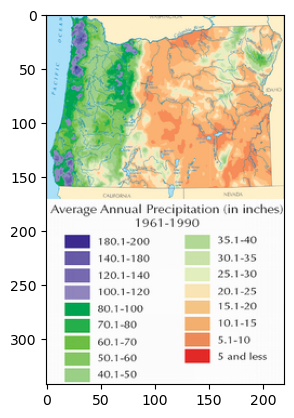

In [54]:
# Import packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read image
img = mpimg.imread('images/test_image.jpg')

# Plot image
plt.imshow(img)

## Selenium

* Sometimes we want even more control...


* Selenium is a package for performing **web browser automation**


* We can use Selenium to enter text in search boxes, click buttons etc. 


```{image} images/selenium.png
:width: 200px
:align: center
```

In [56]:
%%capture
# Install webdriver_manager: https://github.com/SergeyPirogov/webdriver_manager
!pip3 install webdriver_manager

In [57]:
# Import packages
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager

In [58]:
# Install Chrome webdriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Open a web browser at the following page
driver.get("https://www.google.com/maps")

[WDM] - Downloading: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8.82M/8.82M [00:00<00:00, 32.3MB/s]


```{image} images/google_maps.png
:width: 1000px
:align: center
```

```{image} images/inspect.png
:width: 1000px
:align: center
```


In [4]:
# Enter some text in the search box
inputElement = driver.find_element(By.ID, "searchboxinput")
inputElement.send_keys('South Sister Oregon')

```{image} images/enter_text.png
:width: 1000px
:align: center
```


In [5]:
# Click search button
element = driver.find_element(By.ID, "searchbox-searchbutton")
element.click()

```{image} images/search.png
:width: 900px
:align: center
```


## Acknowledgements

Some of the this demo was inspired by [Automating the Boring Stuff](https://automatetheboringstuff.com/2e/chapter12/) Chapter 12.